# Supervised Machien Learning for Cardiovascular Risk Detection

**Autor:** Juan Francisco Rodríguez

**Date:** 13/08/2024

**Github:** https://github.com/jfrg99/Heart-Disease-Classification-using-Supervised-Machine-Learning

## Table of Contents

1. Introduction
2. How to proceed
3. Logistic Regression
4. K Nearest Neighbors
5. Support Vector Machines
6. Decision Trees
7. Comparing Errors
    1. ROC Curves
    2. Confusion Matrix
    3. Error Metrics
8. Conclusion

## 1. Introduction

The second part of this project involves applying various **supervised machine learning classification** models to our preprocessed dataset to predict the target variable, thereby creating a model capable of diagnosing whether a patient is at risk of heart failure.

We will explore and compare the performance of the following classification models: Logistic Regression, K Nearest, Neighbors (KNN), Support Vector Machines (SVM) and Decision Trees.

For each model, we will perform hyperparameter tuning to optimize their performance and then compare them using various evaluation metrics such as accuracy, precision, recall, and F1-score.

The dataset for this project was obtained from the *Kaggle* website and can be found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction). Although small, this dataset contains some of the most important features that related to potential heart disease.

## 2. How to proceed

Now, we are going to apply some machine learning models to our dataset. Specifically, we will apply the main basic models seen during the course: Logistic Regression, K Nearest Neighbors, Support Vector Machines and Decision Trees. We will apply the same process to each one of these model in order to compare them.

To do this, we will use the data set already formatted, that is, normalized and encoded. Let's call this DataFrame as `data`.

In [15]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("heartdata_final.csv")
dataset.head()

,Age,F,M,RBP,Chol,MaxHR,Oldpeak,CPT_ASY,CPT_ATA,CPT_NAP,CPT_TA,RECG_LVH,RECG_N,RECG_ST,STSlope,EAY,EAN,Disease
0,0.244898,0.0,1.0,0.500000,0.393822,0.788732,0.295455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0
1,0.428571,1.0,0.0,0.666667,0.183398,0.676056,0.409091,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1
2,0.183673,0.0,1.0,0.416667,0.382239,0.267606,0.295455,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0
3,0.408163,1.0,0.0,0.483333,0.249035,0.338028,0.465909,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
4,0.530612,0.0,1.0,0.583333,0.212355,0.436620,0.295455,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0


First, we split the features and the target variable.

In [2]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

There are several ways to proceed when applying machine learning models. I will use a cross-validation method to find the best hyperparameters for each model. Concretely, I will use `gridsearchcv`, that do it automatically, combined with `StratifiedShuffleSplit`. After that, I can fit the model and get its scores.

With `StratifiedShuffleSplit` let's create an iterator that generates differents data splits that will be used in the cross-validation process to select the best parameters. With ``train_test_split`` let's create train and test splits that will be used to fit the final model with these best parameters.

In [3]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, train_test_split

# Creating the split instance
strat_shuf_split = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

# Splitting the data for fit the final models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)


## 3. Logistic Regression

Here we will use `LogisticRegression` class. The parameters we can vary are the penalty and the regularization parameter `C`. So we first set the parameter dictionary:

In [4]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

Now, let's define the model an apply the cross-validation. As we are considering `l1` and `l2` penalties, we set the `solver` to `"liblinear"`.

In [5]:
from sklearn.linear_model import LogisticRegression

# Model instance:
model = LogisticRegression(solver = "liblinear")

In [6]:
# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=10, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1')

We can accest to the best parameters and best score using some attributes of the class:

In [7]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Score: 0.8751979068384987


Finally, we define the final model:

In [8]:
# Final model with the best parameters
LR = LogisticRegression(solver = "liblinear",
                        C = best_params['C'],
                        penalty = best_params['penalty'])

# Fitting it with train data
LR.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

## 4. K Nearest Neighbors

Now, let's do the same process for a KNN model using the `KNeighborsClassifier` class. In this case the possible hyperparameters to tune the model are the number of neighbors, the weights and the metrics.

This time we code all together in the same cell.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Score: 0.8640466880136278


In [10]:
# Final model with the best parameters
KNN = KNeighborsClassifier(**best_params)
# Fitting it with all the data
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

## 5. Support Vector Machines

In this case, we will use the `SVC` class, so the possible hyperparameters we can vary are the regularization parameter `C`, the `kernel`, the parameter `gamma`, and some certain parameters for some kernels, such as the `degree` for the `poly` kernel and the `coef0` coeficent for `poly` or `sigmoid`.

Also, we set `probability = True` in the model instance in order to plot the ROC curve later.

In [11]:
from sklearn.svm import SVC

model = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'coef0': 0.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Score: 0.8769643694666538


In [12]:
# Final model with the best parameters
SVM = SVC(**best_params, probability=True)
# Fitting it with all the data
SVM.fit(X_train, y_train)

SVC(C=10, degree=2, gamma='auto', kernel='poly', probability=True)

## 6. Decision Trees

We use `DecisionTreeClassifier`, and the main parameters to vary are the maximum depth and the maximum number of features. As we saw in a demo lab, we can consider these parameters of a certain example to determine the range of values to tune. In fact, we could consider to take its average value.

In [13]:
from sklearn.tree import DecisionTreeClassifier

depths = []
max_features = []
for train_index, test_index in strat_shuf_split.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    depths.append(dt.tree_.max_depth)
    max_features.append(len(dt.feature_importances_))

In [16]:
average_depth = int(np.mean(depths))
average_max_features = int(np.mean(max_features))
print(average_depth,average_max_features)

14 17


In [17]:
model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini'],
    'max_depth':range(1, average_depth + 1, 2),
    'max_features': range(1, average_max_features + 1)}


# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 12}
Best Score: 0.8701638446045414


In [18]:
DT = DecisionTreeClassifier(**best_params)

DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=12)

We can plot the decision tree.

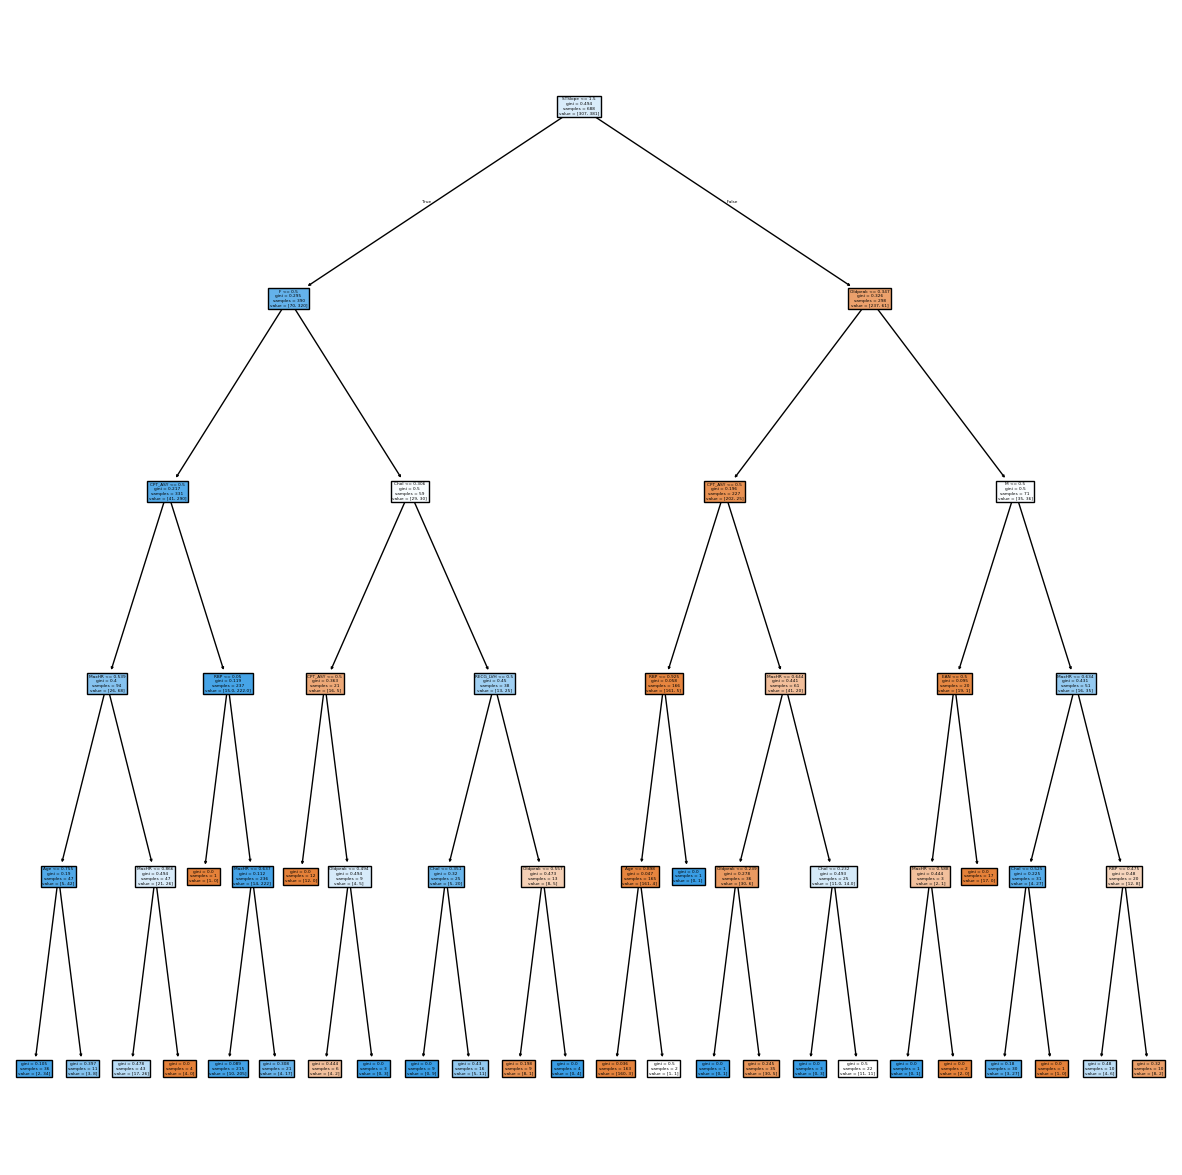

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(15, 15)) 
    plot_tree(model,
              feature_names=feature_names,
              filled=True)
    plt.show()

feature_names = X.columns
plot_decision_tree(DT, feature_names)

plt.show()

## 7. Comparing Models

Now, it's time to compare the four models created. To do that, we can use different plots.

### 7.1 ROC Curves

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


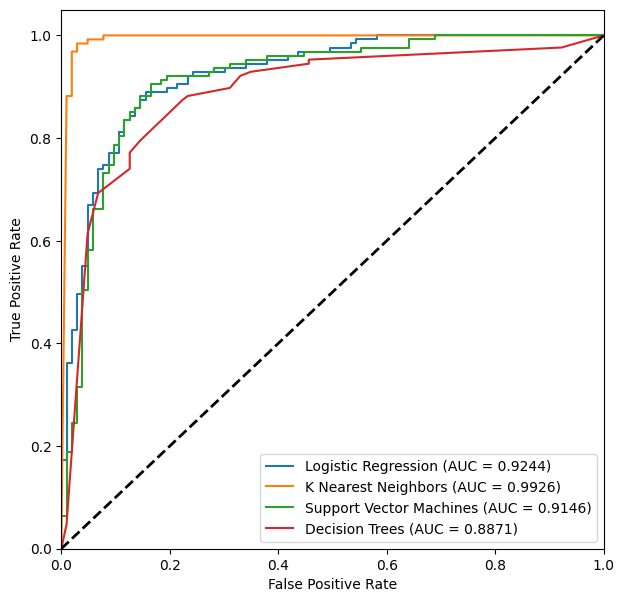

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

models = [LR, KNN, SVM, DT] 
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']
X_test_df = pd.DataFrame(X_test, columns=feature_names)

plt.figure(figsize=(7, 7))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test_df)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### 7.2 Confusion Matrix

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


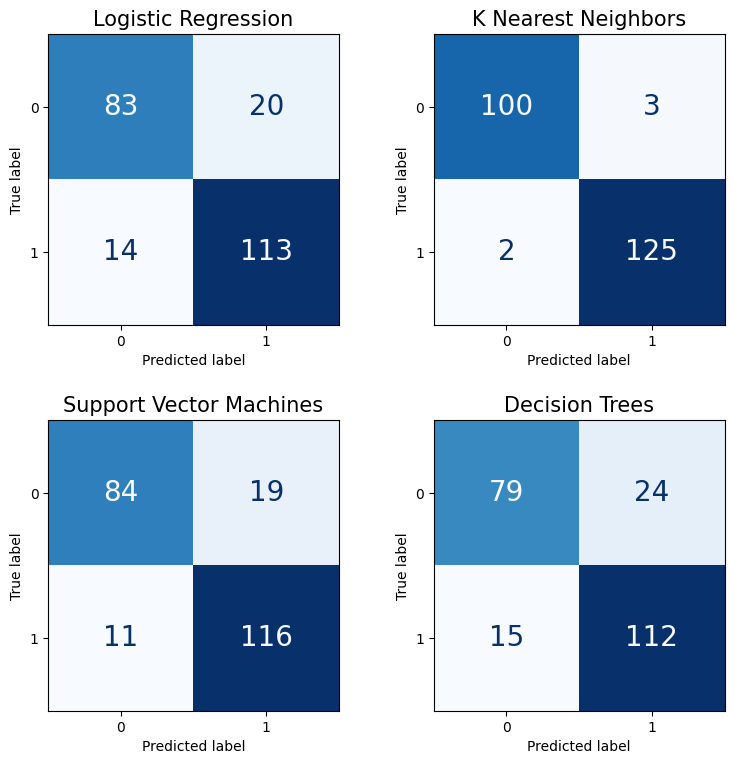

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


models = [LR, KNN, SVM, DT]
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']

# figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterating with each model
for model, name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar = False)
    ax.set_title(name, fontsize = 15)
    for labels in ax.texts:
        labels.set_fontsize(20) 

plt.tight_layout(pad=2.0)
plt.show()

### 7.3 Error Metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(model, X_test, y_test):
    yt = y_test
    yp = model.predict(X_test)
    results_pos = {}
    results_pos['Accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['Recall'] = recall
    results_pos['Precision'] = precision
    results_pos['F1 Score'] = f_beta
    return results_pos

In [24]:
metrics_results = {}

for model, name in zip(models, model_names):
    metrics_results[name] = evaluate_metrics(model, X_test, y_test)

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


We can show the metrics in a DataFrame.

In [25]:
error_df = pd.DataFrame(metrics_results).T
error_df

,Accuracy,Recall,Precision,F1 Score
Logistic Regression,0.852174,0.889764,0.849624,0.869231
K Nearest Neighbors,0.978261,0.984252,0.976562,0.980392
Support Vector Machines,0.869565,0.913386,0.859259,0.885496
Decision Trees,0.830435,0.881890,0.823529,0.851711


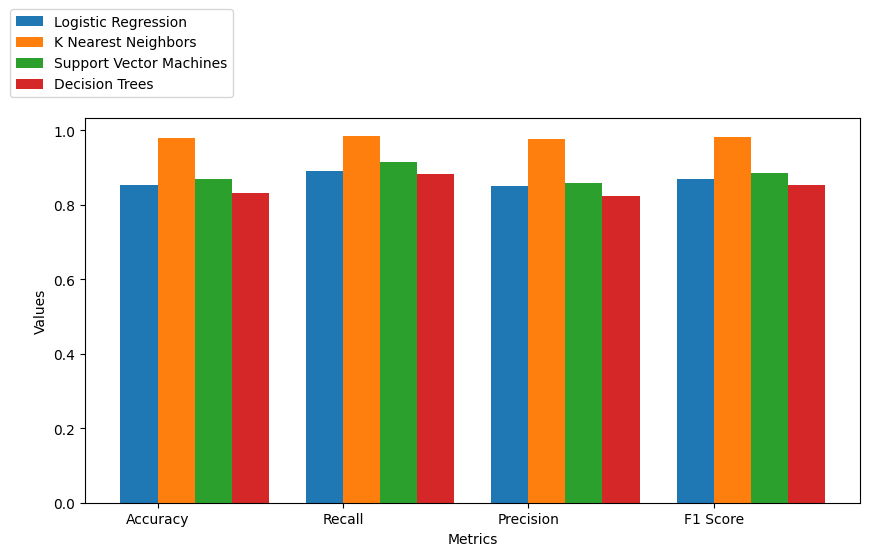

In [26]:
import matplotlib.pyplot as plt
import numpy as np

metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
x = np.arange(len(metrics_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

for i, (name, metrics) in enumerate(metrics_results.items()):
    values = [metrics[metric] for metric in metrics_names]
    ax.bar(x + i*width, values, width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
#ax.set_title('Metric Error Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics_names)
ax.legend(loc='upper right', bbox_to_anchor=(0.2, 1.3))

plt.show()


### 8. Conclusion

Looking at these graphs, we can say that KNN is the one that has made the best predictions, while the other three models are very evenly matched.
- Looking at the ROC curves, we see that the area for KNN is very close to 1, for the others it is around 0.92.
- Regarding the confusion matrix, KNN is the best at predicting both positive and negative outcomes. Logistic Regression and SVM are practically the same; and comparing them with Decision Trees, we see that the first two are more successful at predicting negative outcomes, while Decision Trees is better at predicting positive outcomes.
- Looking at the error metrics. KNN is better in all of them, while the other models are around the same values.